# This example shows the use of GY-elemnt in multi-domain model (electrical motor)


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg


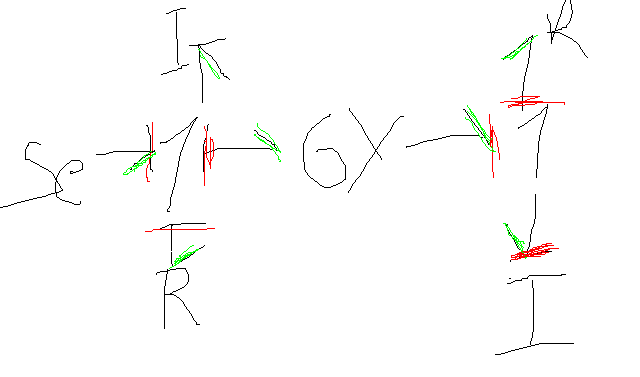

In [2]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model of motor')

In [3]:
#Create some elements
GY_1 = bg.BGelement('GY')

SE_1 = bg.BGelement('SE')

R_1 = bg.BGelement('R', Position=[3,4])
R_2 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I')
I_2 = bg.BGelement('I')

OneJ_1 = bg.BGelement('1')
OneJ_2 = bg.BGelement('1')


In [4]:
# Add the created elements to the model
model.addElement(OneJ_1)
model.addElement(OneJ_2)

model.addElement(R_1)
model.addElement(R_2)
model.addElement(I_1)
model.addElement(I_2)
model.addElement(SE_1)

model.addElement(GY_1)


In [5]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(R_1, OneJ_1)
model.connect(GY_1, OneJ_1)
model.connect(GY_1, OneJ_2)
model.connect(OneJ_2, I_2)

model.connect(R_2, OneJ_2)


In [6]:
bg.show_ports_state(model)

Element name:  1_6
++ port_id: 1 |  arrow:  None |  causality:  None
++ port_id: 3 |  arrow:  None |  causality:  None
++ port_id: 5 |  arrow:  None |  causality:  None
++ port_id: 7 |  arrow:  None |  causality:  None
Element name:  1_7
++ port_id: 9 |  arrow:  None |  causality:  None
++ port_id: 10 |  arrow:  None |  causality:  None
++ port_id: 13 |  arrow:  None |  causality:  None
Element name:  R_2
++ port_id: 4 |  arrow:  None |  causality:  None
Element name:  R_3
++ port_id: 12 |  arrow:  None |  causality:  None
Element name:  I_4
++ port_id: 2 |  arrow:  None |  causality:  None
Element name:  I_5
++ port_id: 11 |  arrow:  None |  causality:  None
Element name:  SE_1
++ port_id: 0 |  arrow:  None |  causality:  None
Element name:  GY_0
++ port_id: 6 |  arrow:  None |  causality:  None
++ port_id: 8 |  arrow:  None |  causality:  None


In [7]:
model.applyRules()

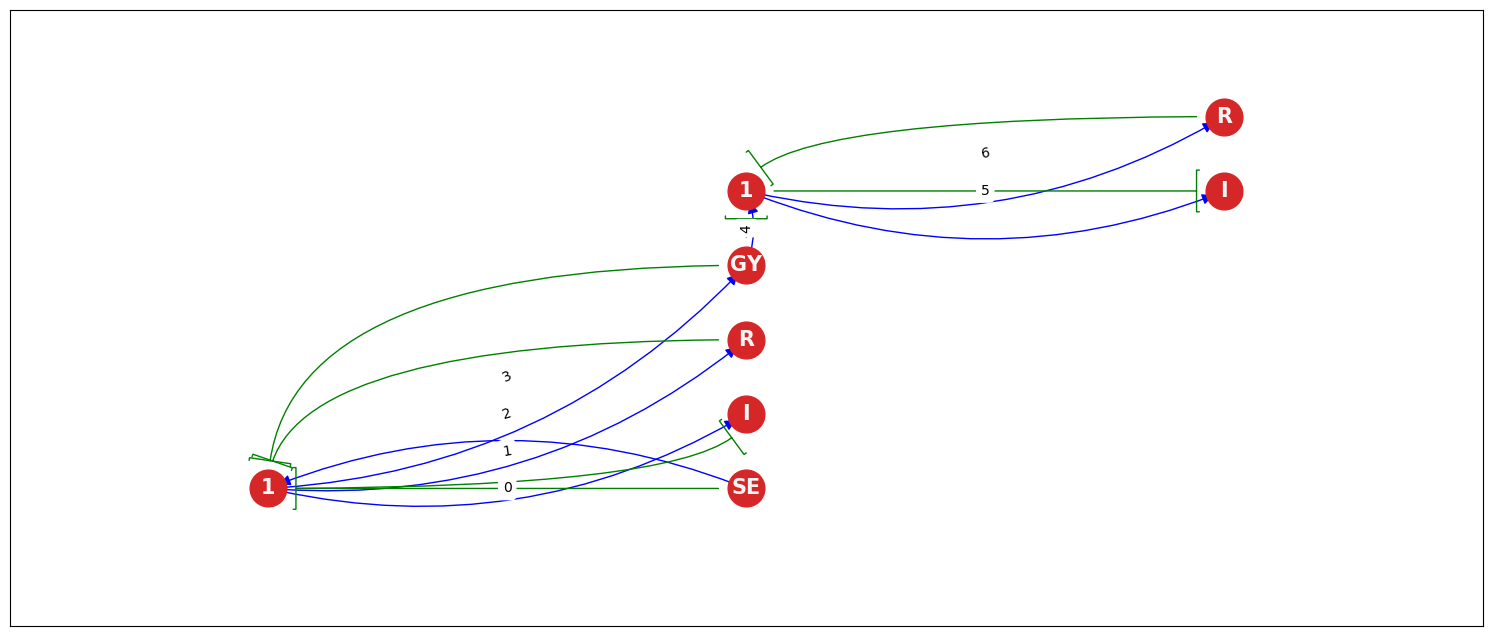

In [8]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

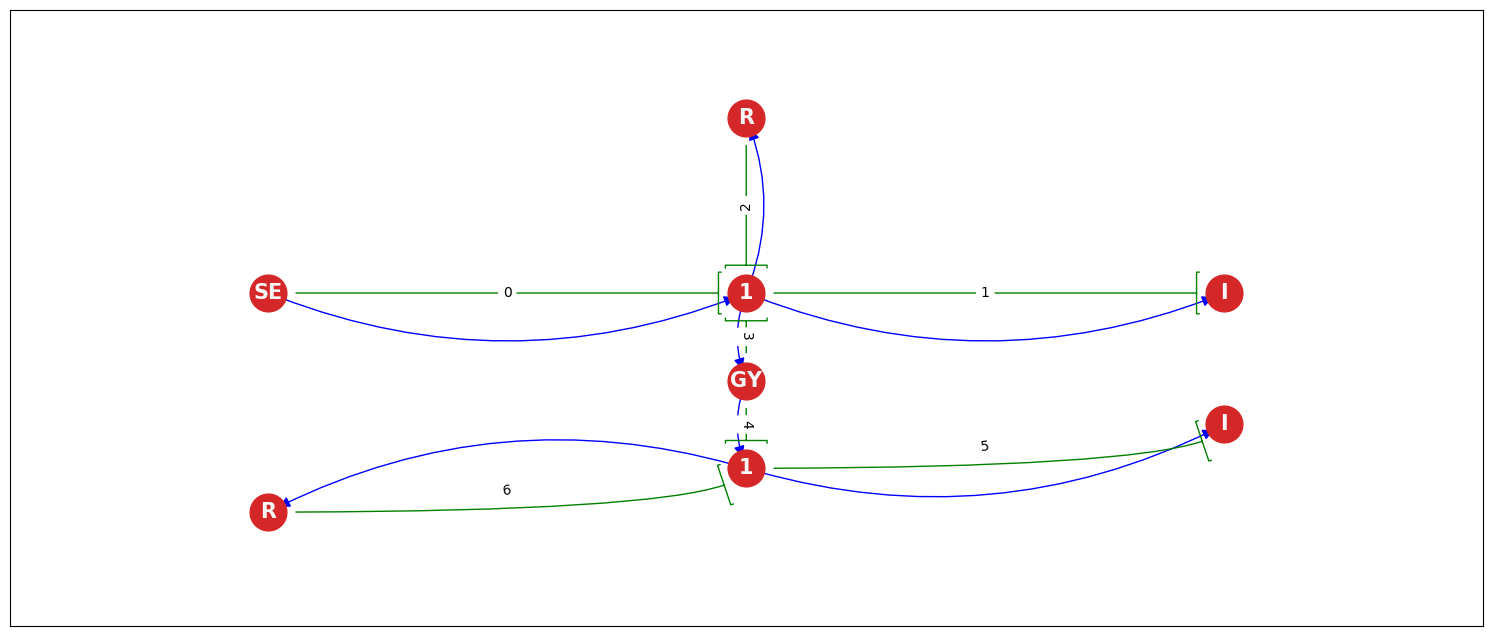

In [9]:
# set positions manually
SE_1.setPosition([1,7])
OneJ_1.setPosition([2,7])
I_1.setPosition([3,7])
R_1.setPosition([2,11])
GY_1.setPosition([2,5])
OneJ_2.setPosition([2,3])

I_2.setPosition([3,4])
R_2.setPosition([1,2])


# draw
model.draw()

In [11]:
model.verifyRules()

In [12]:
bg.show_ports_state(model)

Element name:  1_6
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 5 |  arrow:  Output |  causality:  Causal
++ port_id: 7 |  arrow:  Output |  causality:  Causal
Element name:  1_7
++ port_id: 9 |  arrow:  Input |  causality:  Causal
++ port_id: 10 |  arrow:  Output |  causality:  Uncausal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  R_2
++ port_id: 4 |  arrow:  Input |  causality:  Uncausal
Element name:  R_3
++ port_id: 12 |  arrow:  Input |  causality:  Uncausal
Element name:  I_4
++ port_id: 2 |  arrow:  Input |  causality:  Causal
Element name:  I_5
++ port_id: 11 |  arrow:  Input |  causality:  Causal
Element name:  SE_1
++ port_id: 0 |  arrow:  Output |  causality:  Uncausal
Element name:  GY_0
++ port_id: 6 |  arrow:  Input |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Uncausal


## assign_equations SEQ


In [13]:
model.assign_equations()
equations = model.get_model_equations()


assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 6 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 4 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 2 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 0 , type:  1 GY -----------------------
from 1 to GY detected Output Input
Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= None el2 flow= None
GY prepared flow +f3*m0
-++GY effort=  flow= +f0=+f1=+f2=+f3
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  GY 1 -----------------------
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= None el1 flow= +f3*m0 elem2 eff= +e4-e5-e6 elem2 fl= +f4=+f5=+f6
-+-GY effort=  flow= +f4=+f5=+f6
BOND ID= 4
.....for elements C, I, R, SE, S

In [14]:
bg.show_bonds_effort_flow(model)

Bond id 0, effort=+e0=+SE1, flow=+f0=+f1=+f2=+f3
Bond id 1, effort=+e1=+e0-e2-e3, flow=+f1=+1/I4*p4
Bond id 2, effort=+e2=+R2*f2, flow=+f0=+f1=+f2=+f3
Bond id 3, effort=+e3=+f4*m0, flow=+f0=+f1=+f2=+f3
Bond id 4, effort=+e4=+f3*m0, flow=+f4=+f5=+f6
Bond id 5, effort=+e5=+e4-e6, flow=+f5=+1/I5*p5
Bond id 6, effort=+e6=+R3*f6, flow=+f4=+f5=+f6


In [17]:
equations 

['+e0=+SE1',
 '+f0=+f1=+f2=+f3',
 '+e1=+e0-e2-e3',
 '+f1=+1/I4*p4',
 '+e2=+R2*f2',
 '+f0=+f1=+f2=+f3',
 '+e3=+f4*m0',
 '+f0=+f1=+f2=+f3',
 '+e4=+f3*m0',
 '+f4=+f5=+f6',
 '+e5=+e4-e6',
 '+f5=+1/I5*p5',
 '+e6=+R3*f6',
 '+f4=+f5=+f6']

## State-space form sequence

In [18]:
cauchy_state_equastions, variables_exp = model.cauchy_form_equastions_sequence()

assign_bonds...
.....for elements C, I, R, SE, SF
both elements found...id-s: 1 6 , type:  SE 1 -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 4 , type:  1 I -----------------------
Express: not found the variable, inverse variable check
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 2 , type:  1 R -----------------------
.....for elements C, I, R, SE, SF
both elements found...id-s: 6 0 , type:  1 GY -----------------------
from 1 to GY detected Output Input
Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= +f4*m0 el2 flow= +f3*m0
-++GY effort= +e3=+f4*m0 flow= +f0=+f1=+f2=+f3
.....for elements C, I, R, SE, SF
both elements found...id-s: 0 7 , type:  GY 1 -----------------------
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= +f4*m0 el1 flow= +f3*m0 elem2 eff= +e4-e5-e6 elem2 fl= +f4=+f5=+f6
-+-GY effort= +e4=+f3*m0 flow= +f4=+f5=+f6
BOND ID= 4
.....for elements C, I, R, SE,

In [19]:
model.final_variables

[SE1, p4, p5, R2, R3, I4, I5, m0]

In [20]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dp4/dt = SE1 - m0*p5/I5 - R2*p4/I4
dp5/dt = -R3*p5/I5 + m0*p4/I4
####################################################
State variables:  [p4, p5]


In [21]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f4, f3, e2, e0, e4, e5, f6, e6, f2, e1, f5, f1, e3, f0] 
variables list: [SE1, p4, p5, R2, R3, I4, I5, m0] 
 inputs: [SE1]


In [22]:
variables_exp

{f4: [f5],
 f3: [f0],
 e2: [R2*f2],
 e0: [SE1],
 e4: [f3*m0],
 e5: [e4 - e6],
 f6: [f4],
 e6: [R3*f6],
 f2: [f0],
 e1: [e0 - e2 - e3],
 f5: [p5/I5],
 f1: [p4/I4],
 e3: [f4*m0],
 f0: [f1]}

## Make state-space eq in matrix from

In [23]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.get_matrix_A()} \n Matrix B: {model.get_matrix_B()}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

component: SE1 args= () --------------
component: -R2*p4/I4 args= (-1, R2, p4, 1/I4) --------------
component: -m0*p5/I5 args= (-1, m0, p5, 1/I5) --------------
component: m0*p4/I4 args= (m0, p4, 1/I4) --------------
component: -R3*p5/I5 args= (-1, R3, p5, 1/I5) --------------
dummy_matrix= Matrix([[-R2/I4, -m0/I5], [m0/I4, -R3/I5]])
component: SE1 args= () --------------
component: -R2*p4/I4 args= (-1, R2, p4, 1/I4) --------------
component: -m0*p5/I5 args= (-1, m0, p5, 1/I5) --------------
component: m0*p4/I4 args= (m0, p4, 1/I4) --------------
component: -R3*p5/I5 args= (-1, R3, p5, 1/I5) --------------
dummy_matrix= Matrix([[1], [0]])
Matrix A: Matrix([[-R2/I4, -m0/I5], [m0/I4, -R3/I5]]) 
 Matrix B: Matrix([[1], [0]])
 input_variables: [SE1] 
 state_variables: [p4, p5]


In [24]:
model.get_matrix_A()

Matrix([
[-R2/I4, -m0/I5],
[ m0/I4, -R3/I5]])

In [25]:
model.get_matrix_B()

Matrix([
[1],
[0]])

## Make С-D-matrix
Now we can set the input variables and get С-В-matrix

In [26]:
output_variables = "e2,f2"
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, output_variables)

Input the names of output variables:
It mast be in list eff_flows:  [f4, f3, e2, e0, e4, e5, f6, e6, f2, e1, f5, f1, e3, f0] (Velocity of Force at some point)
U entered this:  ['e2', 'f2']
output variable=  e2
first match [R2*f2]
next iteration with expression: R2*f0
next iteration with expression: R2*f1
next iteration with expression: R2*p4/I4
output variable=  f2
first match [f0]
next iteration with expression: f1
next iteration with expression: p4/I4


In [27]:
cauchy_form_output_eq

{e2: R2*p4/I4, f2: p4/I4}

In [28]:
model.make_output_statespace(cauchy_form_output_eq)
model.get_matrix_C()

dummy_matrix= Matrix([[R2/I4, 0], [1/I4, 0]])
dummy_matrix= Matrix([[0], [0]])


Matrix([
[-R2/I4, -m0/I5],
[ m0/I4, -R3/I5]])

In [29]:
model.get_matrix_D()

Matrix([
[1],
[0]])

## Make numerical matrixes from symbolic

In [30]:
print('List of system parameters:', model.parameter_variables)
parameters_values = [5, 2, 1/2, 0.9, 2]


List of system parameters: [R2, R3, I4, I5, m0]


In [31]:
model.input_variables

[SE1]

In [32]:
model.state_variables

[p4, p5]

In [33]:
# we must define initial state
initial_state = np.zeros((len(model.state_variables), 1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps = 100
sampling_period = 0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 0] = 0


initial_state:  [[0.]
 [0.]]


In [34]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [35]:

def integrate(output,  initial_state = 0):
    '''
    useful if u wanna inetgrate flow to obtain position.
    '''
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [36]:
print(initial_state.shape, input_sequence.shape, time_steps, sampling_period, parameters_values)

(2, 1) (100, 1) 100 0.5 [5, 2, 0.5, 0.9, 2]


In [37]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


<class 'numpy.ndarray'> (2, 2) <class 'numpy.ndarray'> (2, 1)


In [38]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


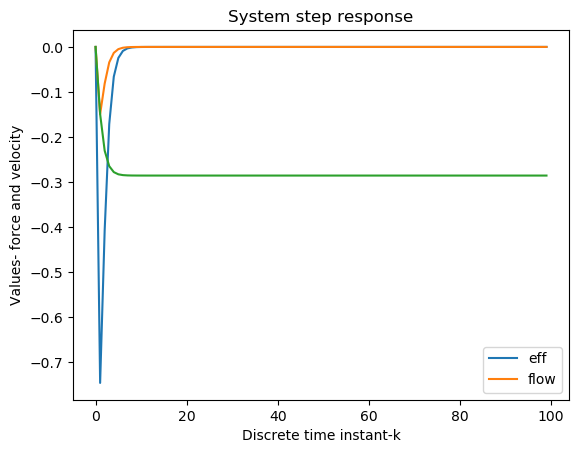

In [39]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('eff', 'flow'))